# Biodiversity in National Parks
We start the analysis by saving the data into a pandas dataframe and analyzing the information.

In [20]:
import pandas as pd

species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

print(species_info.head())
print(observations.head())

  category  ... conservation_status
0   Mammal  ...                 NaN
1   Mammal  ...                 NaN
2   Mammal  ...                 NaN
3   Mammal  ...                 NaN
4   Mammal  ...                 NaN

[5 rows x 4 columns]
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


## Analysis Species Info
The information shows that the data `species_info.csv` contains the category of a species (i.e. mammals), the scientific name, the common names and the conservation status. The conservation status has 191 values, and by further analysis it can be concluded that the spcecies that don't have a status mean they are not a species of concer, endangered, threatened or in recovery.

In [21]:
print(species_info.info())
print()
print(f"Types of conservation status: {species_info.conservation_status.unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None

Types of conservation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


To have actual values and make a better analysis, the species that don't have a conservation status will have a value of `No conservation status`.

In [22]:
species_info.conservation_status = species_info.conservation_status.fillna('No status')

print(species_info.info())
print()
print(f"Types of conservation status: {species_info.conservation_status.unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB
None

Types of conservation status: ['No status' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


To make analysis easier, the column category will be change to a data type of category.

In [17]:
species_info.category = species_info.category.astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             5824 non-null   category
 1   scientific_name      5824 non-null   object  
 2   common_names         5824 non-null   object  
 3   conservation_status  5824 non-null   object  
dtypes: category(1), object(3)
memory usage: 142.7+ KB


## Analysis observations
Now, the analysis on observations shows that the data contains the scientific name, the park where the animal has been seen and how many times it has been seen.

In [23]:
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


### General analysis of data
Now, we can see that between the species that have a status, there are more species of concern that any other status.

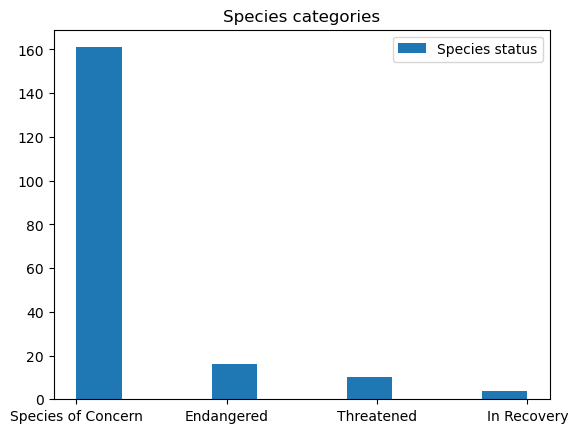

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

species = species_info[species_info.conservation_status != 'No status'].conservation_status

plt.hist(species, label="Species status")
plt.legend()
plt.title("Species categories")
plt.show()
plt.clf()

From the graph below, we can also see that the endangered species that are more common are the mammals, then bird and fish, and at last the amphibian.

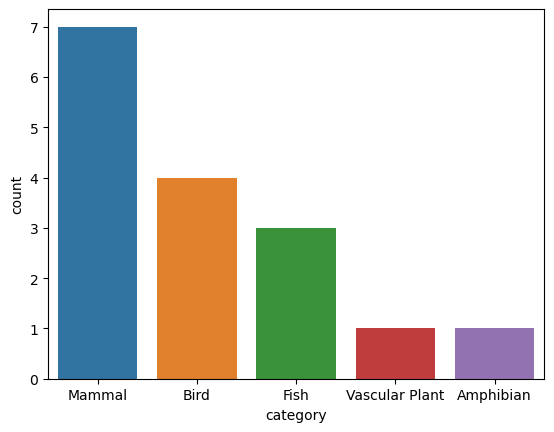

<Figure size 640x480 with 0 Axes>

In [30]:
species_endangered = species_info[species_info.conservation_status == 'Endangered']

sns.countplot(data=species_endangered, x='category')
plt.show()
plt.clf()

As we can see of all the species that exist, the more species that have been seen are:

In [48]:
total_observations = pd.merge(species_info, observations, on='scientific_name', how='inner')
sum_species = total_observations.groupby('scientific_name').observations.sum()
print(sum_species.sort_values(ascending=False))

scientific_name
Streptopelia decaocto    5355
Holcus lanatus           5340
Castor canadensis        5175
Hypochaeris radicata     5160
Puma concolor            5133
                         ... 
Rana sierrae              144
Noturus baileyi           143
Vermivora bachmanii       141
Canis rufus               137
Grus americana            131
Name: observations, Length: 5541, dtype: int64
